In [64]:
# https://www.youtube.com/watch?v=AQk0XpVTMIw

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [65]:
# Seaborndaki hazir veri setlerini gorelim;

dataset_names = sns.get_dataset_names()

for dataset_name in dataset_names:
    print(dataset_name)

anagrams
anscombe
attention
brain_networks
car_crashes
diamonds
dots
dowjones
exercise
flights
fmri
geyser
glue
healthexp
iris
mpg
penguins
planets
seaice
taxis
tips
titanic


In [66]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Gereksiz sutunlari dusurelim


In [68]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [70]:
df.groupby("species").agg(["min", "max", "std", "mean"])

sepal_length                       sepal_width                 \
                    min  max       std   mean         min  max       std   
species                                                                    
setosa              4.3  5.8  0.352490  5.006         2.3  4.4  0.379064   
versicolor          4.9  7.0  0.516171  5.936         2.0  3.4  0.313798   
virginica           4.9  7.9  0.635880  6.588         2.2  3.8  0.322497   

                  petal_length                       petal_width       \
             mean          min  max       std   mean         min  max   
species                                                                 
setosa      3.428          1.0  1.9  0.173664  1.462         0.1  0.6   
versicolor  2.770          3.0  5.1  0.469911  4.260         1.0  1.8   
virginica   2.974          4.5  6.9  0.551895  5.552         1.4  2.5   

                             
                 std   mean  
species                      
setosa      0.105386  0.246  
versicolor  0.197753  1.326  
virginica   0.274650  2.026

In [71]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [72]:
#Bos satirlari mean ile doldurduk.

for column in df.columns[:-1]:
    df[column].fillna(value=df[column].mean(), inplace=True)

In [73]:
df.dropna(axis=0, how="any", inplace=True) # 1 tane bile bos eleman varsa o satiri dusur dedik.

## Verilerin gorsellestirilmesi

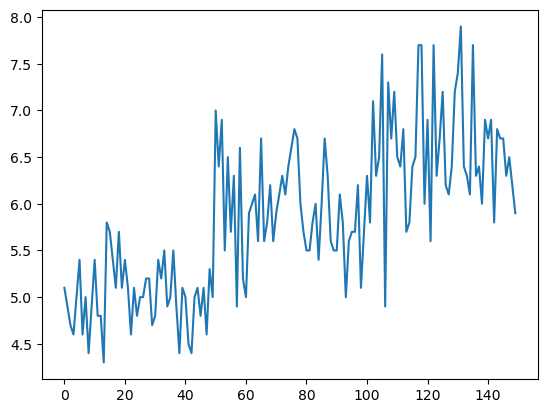

In [74]:
df["sepal_length"].plot();

In [75]:
df.reset_index() # indexe isim verdim

,index,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,virginica
146,146,6.3,2.5,5.0,1.9,virginica
147,147,6.5,3.0,5.2,2.0,virginica
148,148,6.2,3.4,5.4,2.3,virginica


In [76]:
df["id"]=df.index  # index sutununu id olarak isimlendirdim ki grafikte kullanabileyim.

In [77]:
df["id"]

0        0
1        1
2        2
3        3
4        4
      ... 
145    145
146    146
147    147
148    148
149    149
Name: id, Length: 150, dtype: int64

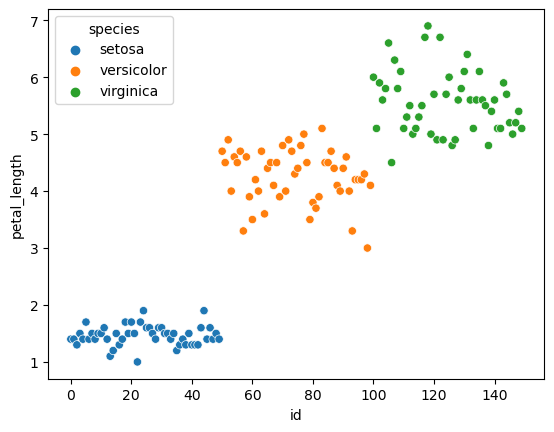

In [78]:
sns.scatterplot(data=df, x="id", y="petal_length", hue="species");

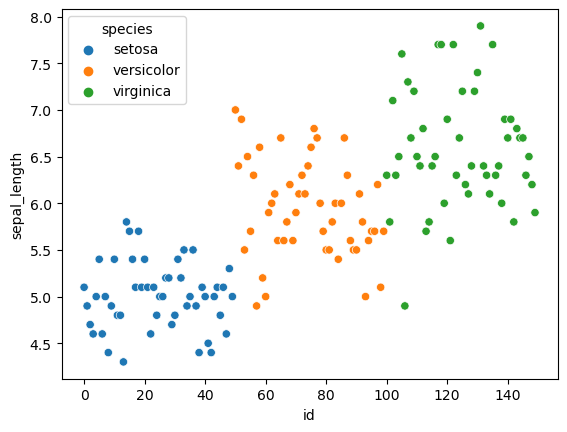

In [79]:
sns.scatterplot(data=df, x="id", y="sepal_length", hue="species");

In [80]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'id'],
      dtype='object')

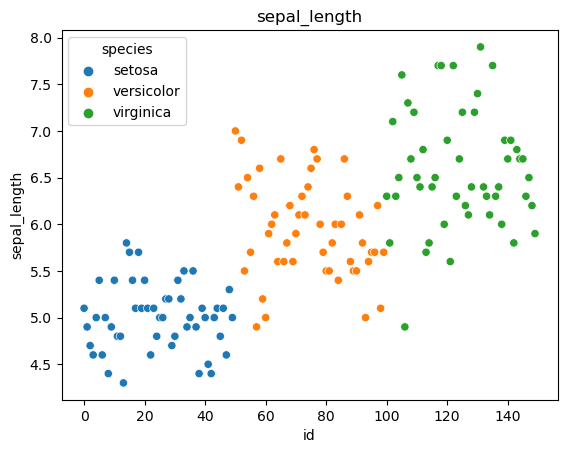

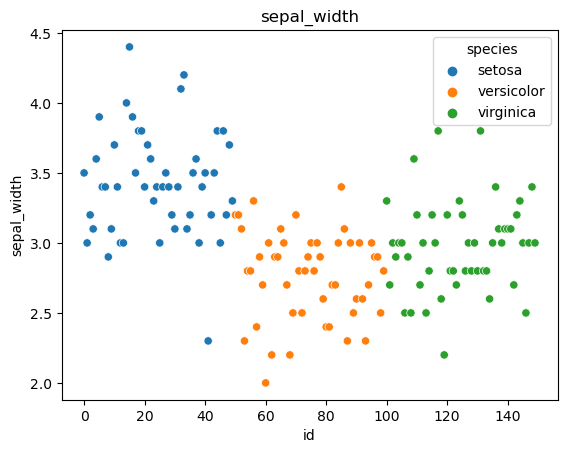

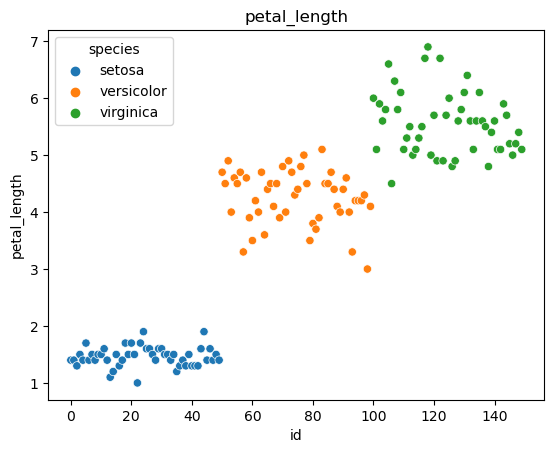

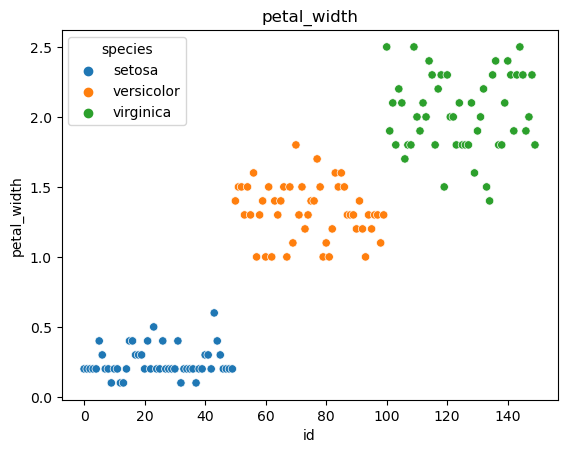

In [81]:
# Bu grafikleri for loop ile cizmek:

for column in df.columns[:-2]:
    sns.scatterplot(data=df, x="id", y=column, hue="species")
    plt.title(column)
    plt.show()


## Outlier Detection 

### 3 Sigma (Standart Sapma) Kurali

3 std sapmalik araigin disinda kalanlari outlier olarak kabul edebiliyoruz.


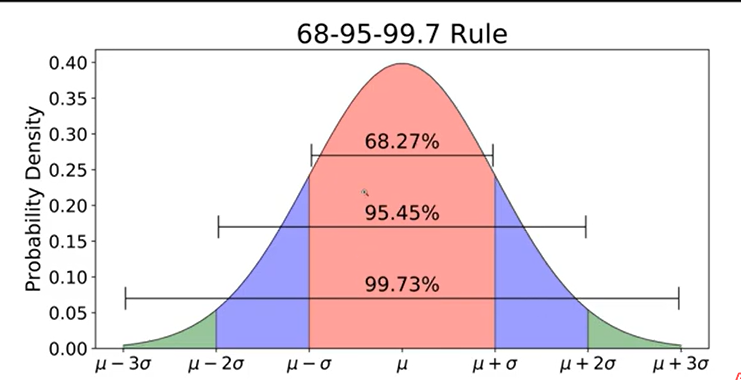

In [82]:
df[df["species"] == "setosa"]   # setosa turune ait bilgileri getir

,sepal_length,sepal_width,petal_length,petal_width,species,id
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,3
4,5.0,3.6,1.4,0.2,setosa,4
5,5.4,3.9,1.7,0.4,setosa,5
6,4.6,3.4,1.4,0.3,setosa,6
7,5.0,3.4,1.5,0.2,setosa,7
8,4.4,2.9,1.4,0.2,setosa,8
9,4.9,3.1,1.5,0.1,setosa,9


In [83]:
selected_spec = df[df["species"] == "setosa"]
selected_spec

,sepal_length,sepal_width,petal_length,petal_width,species,id
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,3
4,5.0,3.6,1.4,0.2,setosa,4
5,5.4,3.9,1.7,0.4,setosa,5
6,4.6,3.4,1.4,0.3,setosa,6
7,5.0,3.4,1.5,0.2,setosa,7
8,4.4,2.9,1.4,0.2,setosa,8
9,4.9,3.1,1.5,0.1,setosa,9


In [84]:
selected_column = selected_spec["sepal_length"] # selected_spec  bu df den "sepal_length" sutununu sec
selected_column 

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal_length, dtype: float64

In [85]:
# bu sutunun avg ve std alalim.

avg = selected_column.mean()
avg

5.006

In [86]:
std = selected_column.std()
std

0.3524896872134512

In [87]:
three_sigma_plus = avg + (3*std)
three_sigma_plus

6.063469061640354

In [88]:
three_sigma_minus = avg - (3*std)
three_sigma_minus

3.9485309383596467

In [89]:
selected_column[((selected_spec["sepal_length"] > three_sigma_plus) | (selected_spec["sepal_length"] < three_sigma_minus))].index

Int64Index([], dtype='int64')

In [91]:
# Buraya kadar 3-sigma kuralona gore outlier olup olmadigini inceledik ve olmadigini gorduk. Bu incelemeyi diger coulumns icin bir dongu ile yapalim.
# For loop;

for column in df.columns[:-2]:
    for spec in df["species"].unique():
        selected_spec = df[df["species"] == spec]
        selected_column = selected_spec[column]  

        
        std = selected_column.std()
        avg = selected_column.mean()
        
        

        three_sigma_plus = avg + (3*std)
        three_sigma_minus = avg - (3*std)
        
        outliers = selected_column[((selected_spec[column] > three_sigma_plus) | (selected_spec[column] < three_sigma_minus))].index
        df.drop(index = outliers, inplace = True)
       
        print(column, spec, outliers)


sepal_length setosa Int64Index([], dtype='int64')
sepal_length versicolor Int64Index([], dtype='int64')
sepal_length virginica Int64Index([], dtype='int64')
sepal_width setosa Int64Index([], dtype='int64')
sepal_width versicolor Int64Index([], dtype='int64')
sepal_width virginica Int64Index([], dtype='int64')
petal_length setosa Int64Index([], dtype='int64')
petal_length versicolor Int64Index([], dtype='int64')
petal_length virginica Int64Index([], dtype='int64')
petal_width setosa Int64Index([], dtype='int64')
petal_width versicolor Int64Index([], dtype='int64')
petal_width virginica Int64Index([], dtype='int64')


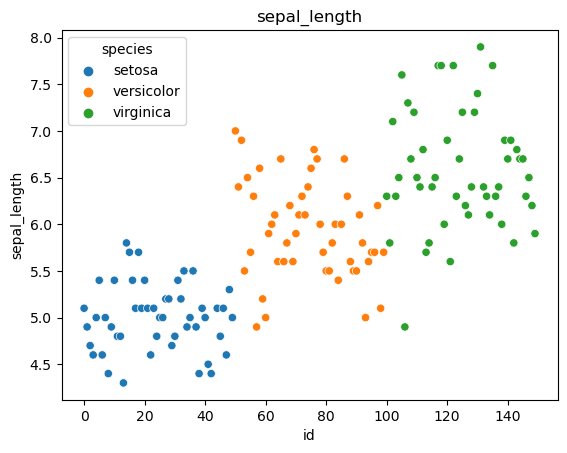

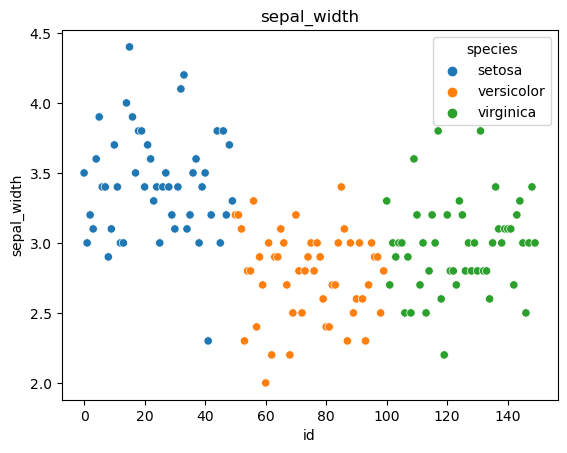

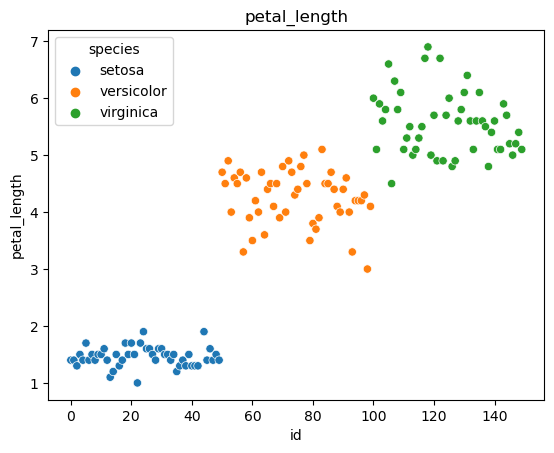

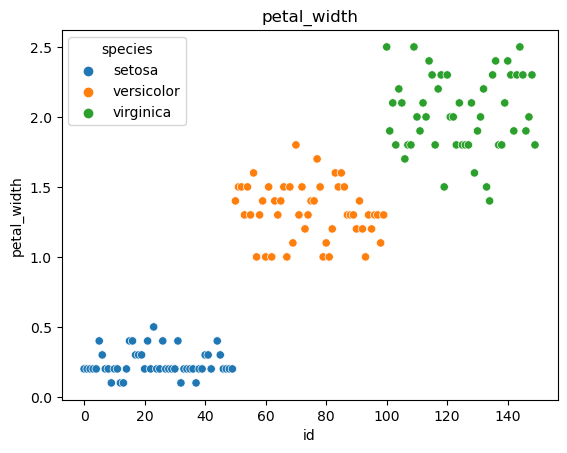

In [92]:
# petal_width setosa index = 43`te outlier vardi, bakalim gitmis mi?

for column in df.columns[:-2]:
    sns.scatterplot(data=df, x="id", y=column, hue="species")
    plt.title(column)
    plt.show()

## IQR ile Outlier Handling


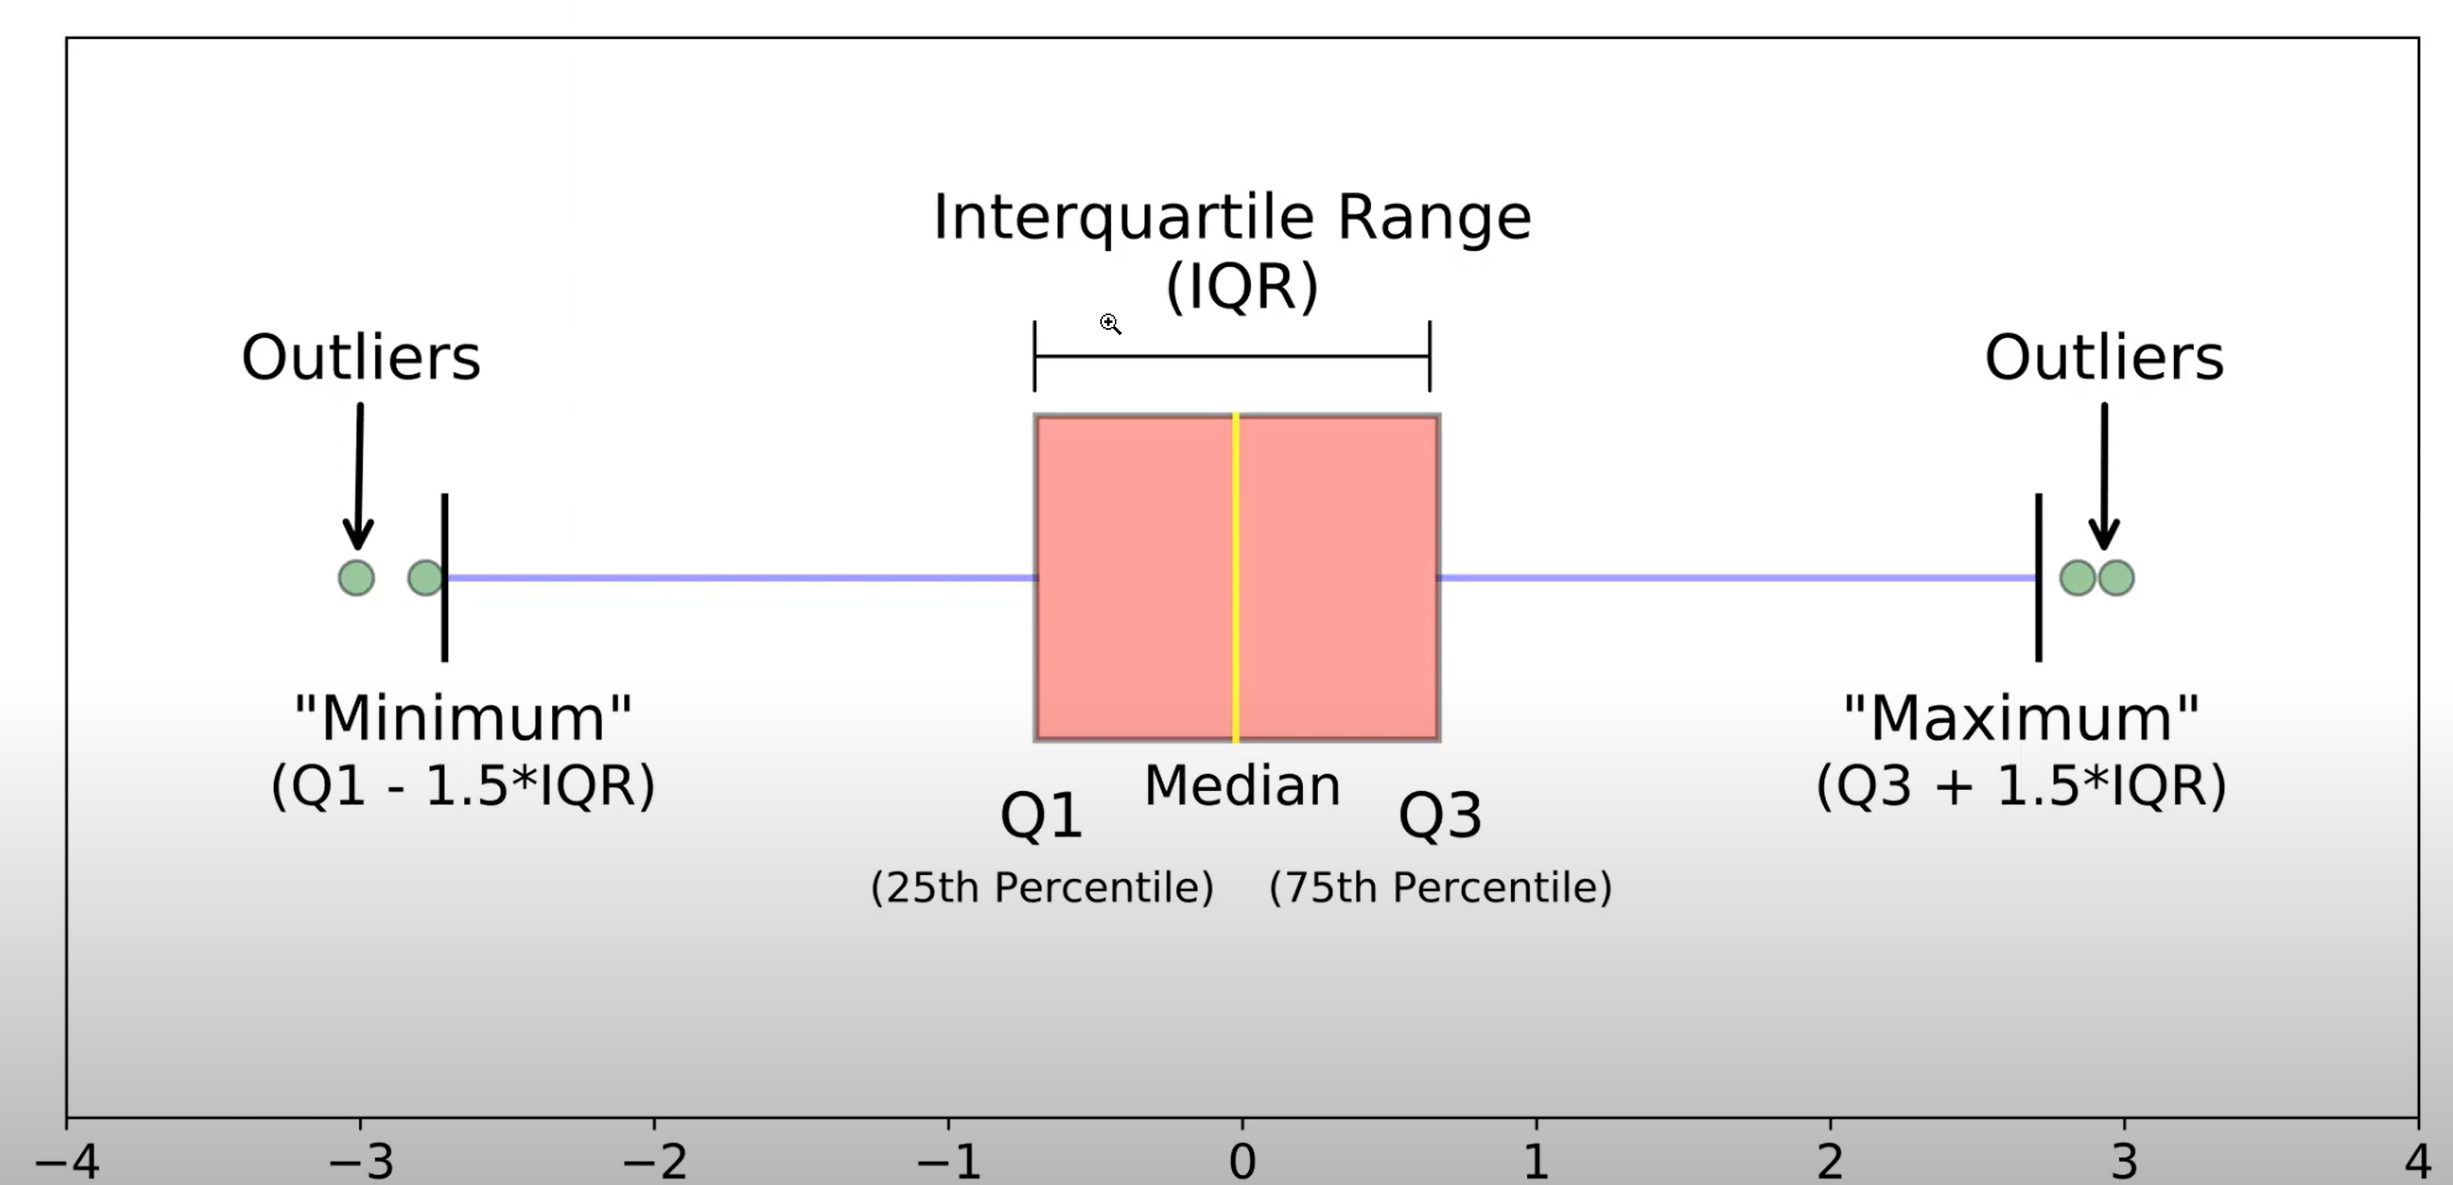

In [114]:
for column in df.columns[:-2]:
    for spec in df["species"].unique():
        selected_spec = df[df["species"] == spec]
        selected_column = selected_spec[column] 
        
        q1 = selected_column.quantile(0.25)
        q3 = selected_column.quantile(0.75)
        
        
        iqr = q3 - q1
        
        lower_bound = q1 - (1.5 * iqr) 
        upper_bound = q3 + (1.5 * iqr)
        
        #print(column, spec, "| altsinir =", lower_bound, " ; ustsinir = ",  upper_bound)
        
        
        max_indxs = df[ (df["species"] == spec) & (df[column] > upper_bound)].index
        print(column, spec, "max_indxs: ", max_indxs)
        
        min_indxs = df[ (df["species"] == spec) & (df[column] < lower_bound)].index
        print(column, spec, "min_indxs: ", min_indxs)
    
        df.drop(index = max_indxs, inplace = True)
        df.drop(index = min_indxs, inplace = True)
        

sepal_length setosa max_indxs:  Int64Index([], dtype='int64')
sepal_length setosa min_indxs:  Int64Index([], dtype='int64')
sepal_length versicolor max_indxs:  Int64Index([], dtype='int64')
sepal_length versicolor min_indxs:  Int64Index([], dtype='int64')
sepal_length virginica max_indxs:  Int64Index([], dtype='int64')
sepal_length virginica min_indxs:  Int64Index([106], dtype='int64')
sepal_width setosa max_indxs:  Int64Index([], dtype='int64')
sepal_width setosa min_indxs:  Int64Index([41], dtype='int64')
sepal_width versicolor max_indxs:  Int64Index([], dtype='int64')
sepal_width versicolor min_indxs:  Int64Index([], dtype='int64')
sepal_width virginica max_indxs:  Int64Index([], dtype='int64')
sepal_width virginica min_indxs:  Int64Index([], dtype='int64')
petal_length setosa max_indxs:  Int64Index([24, 44], dtype='int64')
petal_length setosa min_indxs:  Int64Index([13, 14, 22, 35], dtype='int64')
petal_length versicolor max_indxs:  Int64Index([], dtype='int64')
petal_length versic

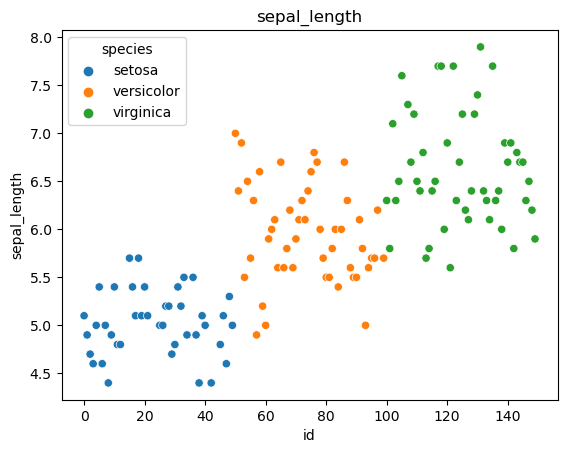

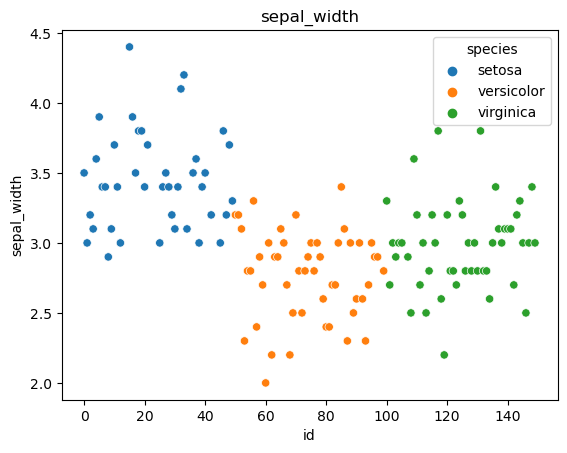

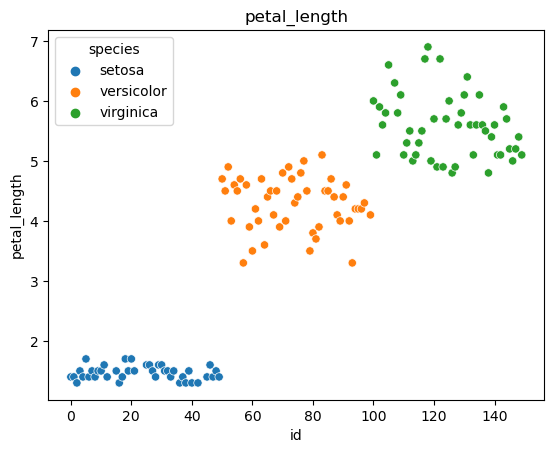

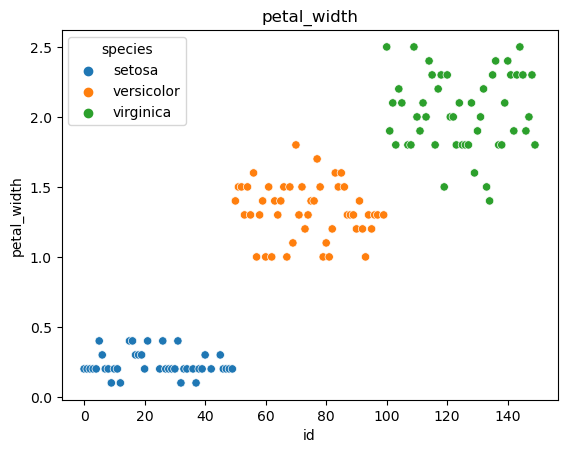

In [115]:
# petal_width setosa max index = 43`te outlier vardi, bakalim gitmis mi?

for column in df.columns[:-2]:
    sns.scatterplot(data=df, x="id", y=column, hue="species")
    plt.title(column)
    plt.show()

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  139 non-null    float64
 1   sepal_width   139 non-null    float64
 2   petal_length  139 non-null    float64
 3   petal_width   139 non-null    float64
 4   species       139 non-null    object 
 5   id            139 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.6+ KB


In [117]:
df.shape

(139, 6)

In [118]:
# Artik data seti ile ilgili on hazirliklar bitti, analize gececegiz. Bu noktada veri setinin son halini kaydedebiliriz.

df.to_csv("final_data.csv")

In [122]:
# Ben bu df  i bir de df_final`e atamak istiyorum;

df_final = df.copy()

In [123]:
df_final.shape

(139, 6)

## Label Encoding

Species kismindaki tur isimlerini numeric haline getirelim

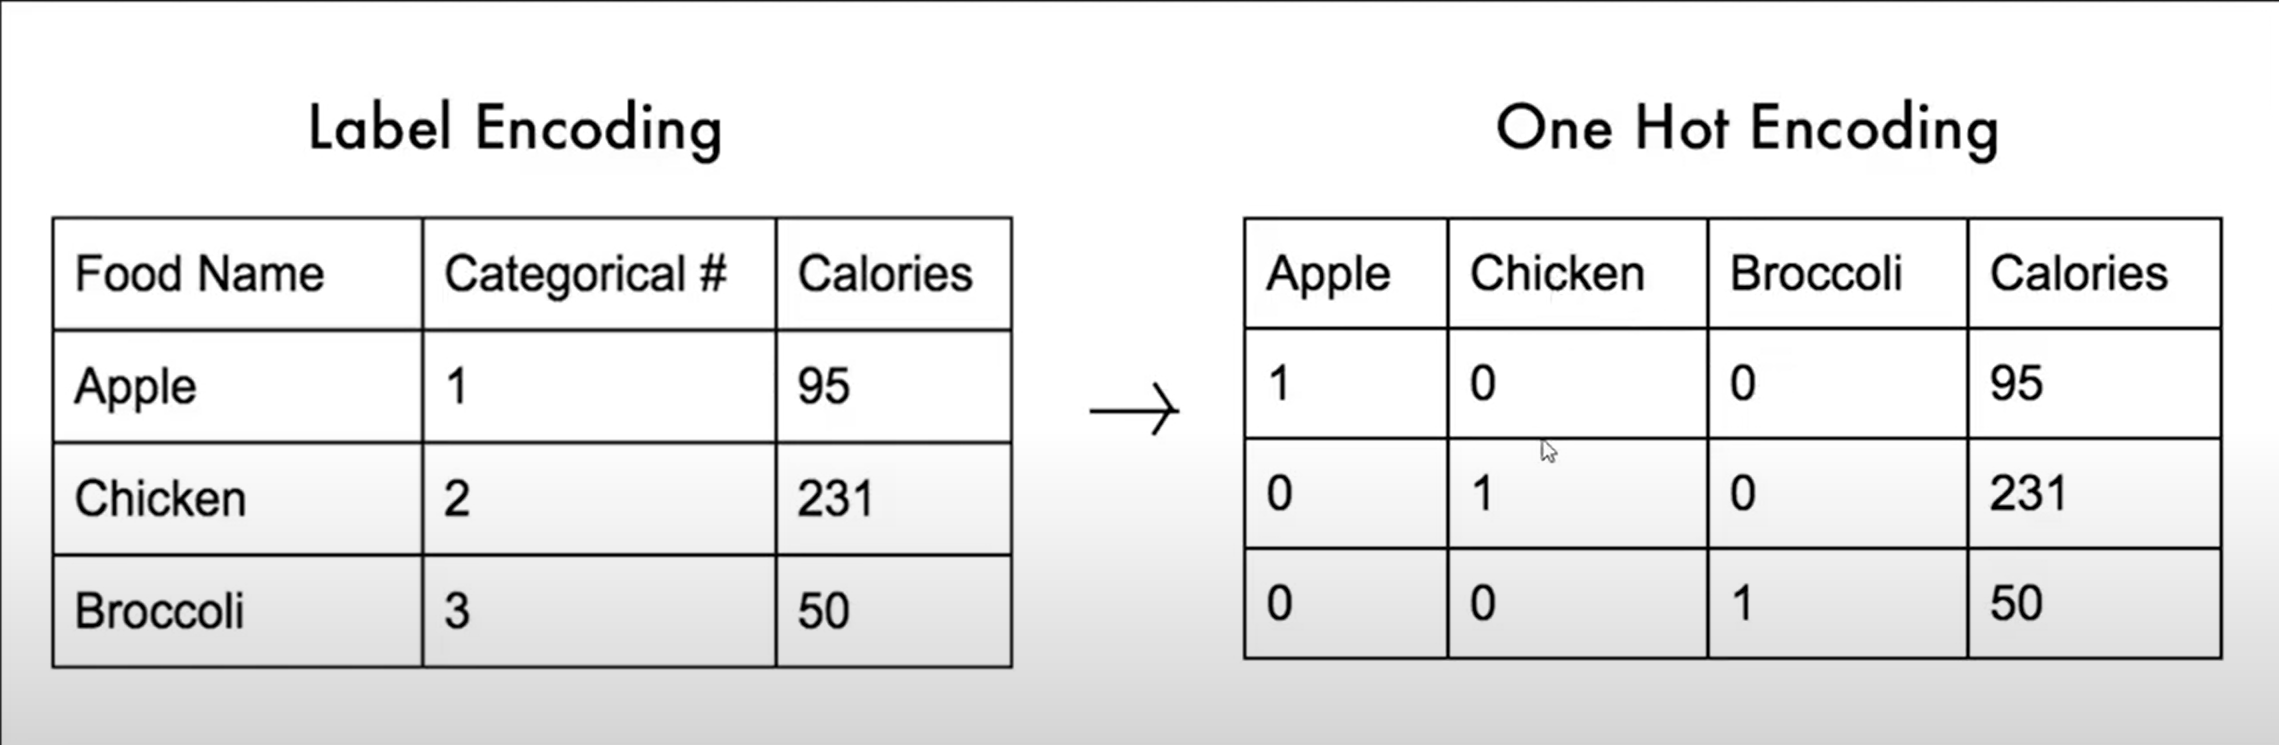

In [124]:
# Label Encoding yapabilmek icin;
from sklearn.preprocessing import LabelEncoder

# Datayi df olarak okutabilmek icin;
import pandas as pd 


In [125]:
df = pd.read_csv("final_data.csv")

In [127]:
df.head(3)

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species,id
0,0,5.1,3.5,1.4,0.2,setosa,0
1,1,4.9,3.0,1.4,0.2,setosa,1
2,2,4.7,3.2,1.3,0.2,setosa,2


In [128]:
# unnamed ve id colinlarinanightiyacimniz yok, onlari drop edelim.

df.drop(["Unnamed: 0", "id"], axis = 1, inplace = True)

In [129]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


## Label Encoding

In [151]:
# "species" colonuna Label Encoding islemi uygulamamiz gerekiyor. 

# Oncelikle bir Label Encoding (le) objesi olusturalim;
le = LabelEncoder()

target= le.fit_transform(df["species"]) 
target 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [152]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
134,6.7,3.0,5.2,2.3,2
135,6.3,2.5,5.0,1.9,2
136,6.5,3.0,5.2,2.0,2
137,6.2,3.4,5.4,2.3,2


In [153]:
df["species"] = target

In [155]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# ML Asamasi

## Veri setinin "train" ve "test" olarak ikiye bolunmesi

In [135]:
## Veriyi ikiye bolmeden once bir kez daha veri setimizi kontrol edelim.
# Veri setinde Null deger var mi?

df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
# Null deger yok

In [137]:
# Veri setinde object formatinda veri var mi?

df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

In [ ]:
# Veri setonde object (str) turunde veri yok. 

## Train_test_split

In [138]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [164]:
from sklearn.model_selection import train_test_split   # veri setini bolmek icin "train_test_split" adinda bir fonksiyon olusturduk

X_train, X_test, y_train, y_test =  train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size = 0.2)


In [139]:
 df.iloc[:, :-1]    # bu kisim features (x degerleri)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
134,6.7,3.0,5.2,2.3
135,6.3,2.5,5.0,1.9
136,6.5,3.0,5.2,2.0
137,6.2,3.4,5.4,2.3


In [142]:
df.iloc[:, -1]   # bu kisim target variable (y degerleri)

0      0
1      0
2      0
3      0
4      0
      ..
134    2
135    2
136    2
137    2
138    2
Name: species, Length: 139, dtype: int64

In [ ]:
# test_size = 0.2   verilerin %20`sini test, %80 ini train olarak ayirmak istedigimizi ifade ediyor. Orneklem sayisi 10.000`den buyuk oldugunda test icin 0.10 da yeterlidir. 
# Bu kod ayni zamanda randomize ederek secim yapar. 


In [145]:
X_train # X bagimsiz degiskenlerinin %80`ik kismi burada. Index numaralarinin degistigine dikkat edelim. 

,sepal_length,sepal_width,petal_length,petal_width
23,5.2,3.4,1.4,0.2
51,5.0,2.0,3.5,1.0
115,6.2,2.8,4.8,1.8
119,7.4,2.8,6.1,1.9
64,6.1,2.8,4.7,1.2
...,...,...,...,...
26,5.4,3.4,1.5,0.4
98,7.2,3.6,6.1,2.5
15,5.1,3.5,1.4,0.3
77,6.7,3.1,4.7,1.5


In [146]:
y_train # y`lerin index numaralarinin X`lerinkiyle ayni olduklarina dikkat edelim. 

23     0
51     1
115    2
119    2
64     1
      ..
26     0
98     2
15     0
77     1
107    2
Name: species, Length: 111, dtype: int64

In [147]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
68,6.7,3.0,5.0,1.7
103,5.8,2.8,5.1,2.4
28,5.5,4.2,1.4,0.2
75,5.4,3.0,4.5,1.5
72,5.5,2.4,3.7,1.0
21,5.0,3.4,1.6,0.4
95,7.6,3.0,6.6,2.1
117,6.4,2.8,5.6,2.1
102,5.7,2.5,5.0,2.0
14,5.4,3.9,1.3,0.4


In [148]:
y_test

68     1
103    2
28     0
75     1
72     1
21     0
95     2
117    2
102    2
14     0
131    2
116    2
86     1
130    2
6      0
56     1
70     1
19     0
47     1
12     0
3      0
44     1
81     1
59     1
80     1
17     0
29     0
32     0
Name: species, dtype: int64

In [149]:
len(y_test)

## Toplam 139 gozlemimiz vardi. Bunlardan 139*0.80 = 111 ini train icin, 139*0.20 = 28`ini test icin ayirdik. 

28

In [156]:
# Dagilimin  turler acisindan dengeli olup olmadigina bakalim

y_train.value_counts()

2    42
1    38
0    31
Name: species, dtype: int64

In [157]:
y_test.value_counts()

1    11
0    10
2     7
Name: species, dtype: int64

In [165]:
# Dagilim tam esit  olmadigi icin split kismini bir daha calisitip kontrol ettik. En dengeli dagilimi yakaldigiiz yerde biraktir. 
y_train.value_counts()

1    41
2    39
0    31
Name: species, dtype: int64

In [166]:
y_test.value_counts()

0    10
2    10
1     8
Name: species, dtype: int64

## Modelin Olusturulmasi

In [171]:
!pip install xgboost
import xgboost as xgb
xgb_cls = xgb.XGBClassifier(objective = "multiclass:softmax", num_class=3)  # classifiaction yapmak icin XGBClassifier kutuphanesini kullaniyoruz. 
                                                                            # num_class=3  class sayisini belirtiyor. 


In [173]:
xgb_cls.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [175]:
preds = xgb_cls.predict(X_test) # Tahmin edilen y degerleri buradan elde ediliyor.
preds 

array([0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       0, 2, 0, 2, 0, 0], dtype=int64)

In [176]:
# gercek y degerleri burada;

y_test

31     0
98     2
22     0
111    2
47     1
137    2
12     0
20     0
95     2
116    2
59     1
21     0
105    2
52     1
102    2
127    2
9      0
57     1
81     1
41     1
73     1
78     1
27     0
109    2
30     0
104    2
33     0
26     0
Name: species, dtype: int64

## Metrics

In [179]:
# Yapilan bu tahmin ne kadar basarili? Buna yonelik metriklere bakacagiz. 
from sklearn.metrics import accuracy_score, confusion_matrix 

# accuracy_score; modelin basarisini olcer
# confusion_matrix; Elde edilen sonuca gore yapilan hipotz tewti sonucunun dogrulugunu olcen matrix



# confusion_matrix
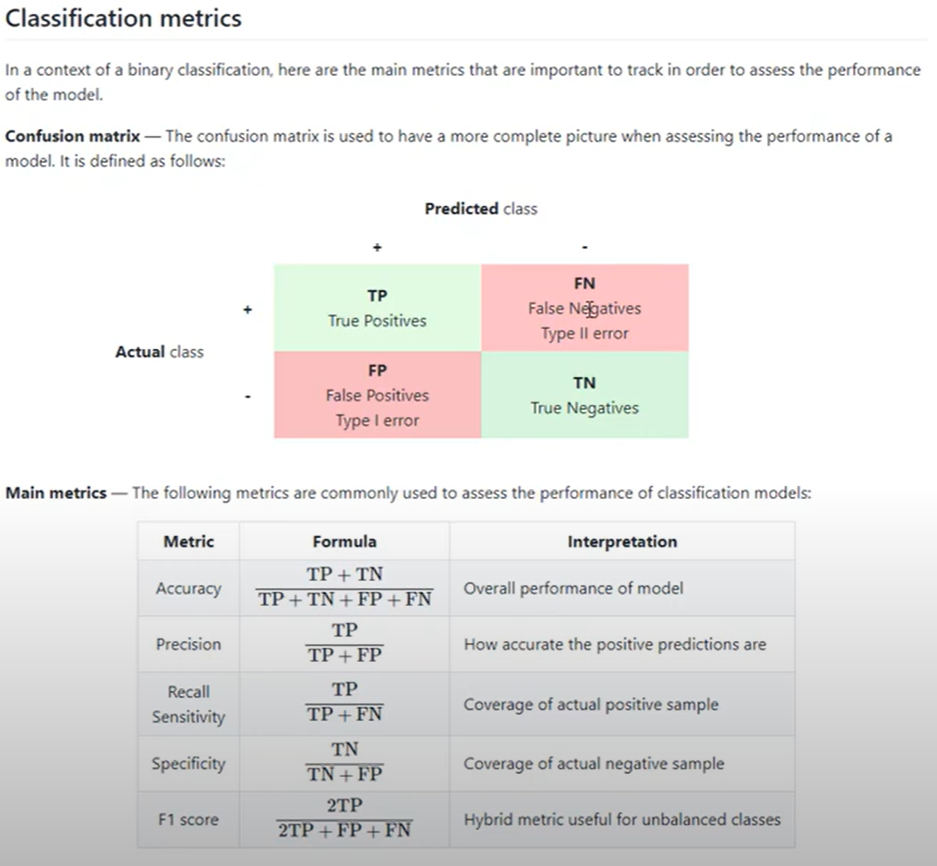




In [180]:
# accurance testi yapip accurance score elde edelim;

accuracy_score(y_test, preds)

0.9642857142857143

In [ ]:
## Goruldugu gibi acccuracy score = 0.96 cikti. Model %96basari duzeyine sahip.

In [181]:
confusion_matrix(y_test, preds)

array([[10,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

In [ ]:
## Ilk satira gore; 10 tane degeri 0 olarak tahmin etmisiz, diger sutunlar bos oldugu icin bu tahmin dogru.
## 2. satira gore; 8 tane degeri 1 olarak tahminetmisiz ve bu da dogru (diger sutunlar bos cunku).
## 3. satira gore; 1 tane degeri 1, 9 tane degeri 2 olarak tahmin etmisiz. Burada 1 tane hata var. 

# Boylece ilk Machine Learning Projem Bitmis Oldu :))